<a href="https://colab.research.google.com/github/Yashwanthreddy1789/machine-learning/blob/main/SPAM_SMS_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load the Data
file_path = '/content/spam.csv'
df = pd.read_csv(file_path, encoding='latin-1')

In [3]:
# Examine the structure of the Data
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [4]:
# Data Preprocessing
df = df[['v1', 'v2']]  # Selecting relevant columns
df.columns = ['label', 'message']  # Renaming columns
df['label'] = df['label'].map({'ham': 0, 'spam': 1})  # Encoding labels
X = df['message']
y = df['label']

<ipython-input-4-97cac7ef8560>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].map({'ham': 0, 'spam': 1})  # Encoding labels


In [5]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Feature Extraction using TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [7]:
# Classifiers
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC()
}

In [8]:
results = {}

In [9]:
# Training and Evaluating Models
for name, clf in classifiers.items():
    clf.fit(X_train_tfidf, y_train)
    y_pred = clf.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    results[name] = {
        'Accuracy': acc,
        'Classification Report': classification_report(y_test, y_pred, output_dict=True)
    }

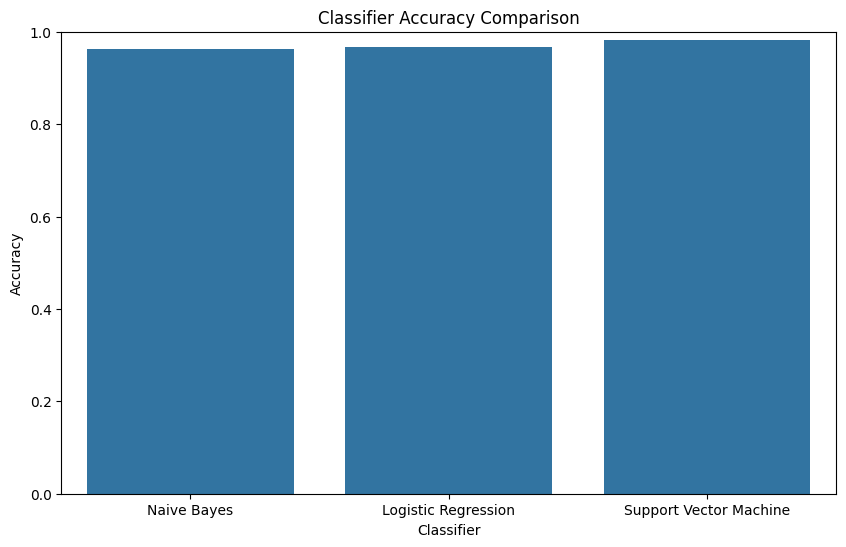

In [10]:
# Visualization of Results
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=[result['Accuracy'] for result in results.values()])
plt.title('Classifier Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.ylim(0, 1)
plt.show()

In [11]:
# Displaying Classification Reports
for name, result in results.items():
    print(f"--- {name} ---")
    print(result['Classification Report'])

--- Naive Bayes ---
{'0': {'precision': 0.958291956305859, 'recall': 1.0, 'f1-score': 0.9787018255578094, 'support': 965.0}, '1': {'precision': 1.0, 'recall': 0.72, 'f1-score': 0.8372093023255814, 'support': 150.0}, 'accuracy': 0.9623318385650225, 'macro avg': {'precision': 0.9791459781529295, 'recall': 0.86, 'f1-score': 0.9079555639416954, 'support': 1115.0}, 'weighted avg': {'precision': 0.9639029038880305, 'recall': 0.9623318385650225, 'f1-score': 0.9596669569615457, 'support': 1115.0}}
--- Logistic Regression ---
{'0': {'precision': 0.964964964964965, 'recall': 0.9989637305699481, 'f1-score': 0.9816700610997964, 'support': 965.0}, '1': {'precision': 0.9913793103448276, 'recall': 0.7666666666666667, 'f1-score': 0.8646616541353384, 'support': 150.0}, 'accuracy': 0.967713004484305, 'macro avg': {'precision': 0.9781721376548963, 'recall': 0.8828151986183075, 'f1-score': 0.9231658576175674, 'support': 1115.0}, 'weighted avg': {'precision': 0.9685184643434218, 'recall': 0.967713004484305